<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-06-24 01:48:11--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv.1’

survey-data.csv.1   100%[===================>] 152.13M  64.4MB/s    in 2.4s    

2025-06-24 01:48:16 (64.4 MB/s) - ‘survey-data.csv.1’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [2]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 161.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 163.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 136.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 142.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 98.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 129.5 MB/s eta 0:00:00


**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [3]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [ ]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [ ]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [ ]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


## Demo: Listing All Tables


To view the names of all tables in the database:


In [ ]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [ ]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [ ]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


In [ ]:
pip install seaborn

In [ ]:
print(df.columns.tolist())


In [ ]:
QUERY = "SELECT * FROM main"
df = pd.read_sql_query(QUERY, conn)


In [ ]:
## Write your code here
import matplotlib.pyplot as plt
import seaborn as sns

# Drop missing or invalid values
comp_data = df['CompTotal'].dropna()

plt.figure(figsize=(10,6))

# Plot histogram
sns.histplot(comp_data, bins=50, kde=False, color='teal')

plt.title('Histogram of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation')
plt.ylabel('Number of Respondents')
plt.grid(True)

plt.tight_layout()
plt.show()


**Box Plots**

Plot a box plot of Age.


<Axes: ylabel='Age'>

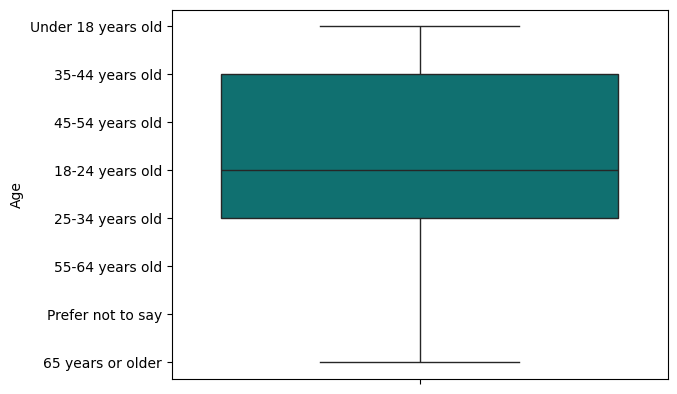

In [14]:
## Write your code here
sns.boxplot(df['Age'].dropna(),color='teal')

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = "survey-data.csv"  # Replace with actual file path
df = pd.read_csv(file_path)

# Drop rows with missing Age or WorkExp
df_clean = df[['Age', 'WorkExp']].dropna()

# Convert WorkExp to numeric (in case of non-numeric entries)
df_clean['WorkExp'] = pd.to_numeric(df_clean['WorkExp'], errors='coerce')

# Drop rows where conversion failed
df_clean = df_clean.dropna()

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['Age'], df_clean['WorkExp'], alpha=0.6, color='teal')
plt.xlabel('Age Group')
plt.ylabel('Years of Work Experience')
plt.title('Scatter Plot of Age Group vs. Work Experience')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'pandas'

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


In [ ]:
## Write your code here

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


In [ ]:
## Write your code here

**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


In [ ]:
## Write your code here

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


In [ ]:
## Write your code here

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


In [ ]:
## Write your code here

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [ ]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
